# The Battle of the Neighborhoods 

## To Find the best place to construct a student hall in London City  
____________________________________________________________

## 1.Introduction

### 1.1 Background

London is considered as one of the popular destinations for higher education where students from all around the world travel to pursue their educations. Overseas students are increasingly selecting London as their study destination of choice, with 2018-19 representing a record year for international students in the UK capital in the past decade.

According to new data from the Higher Education Statistics Agency (HESA), the total number of international students grew 5.8%, representing an uplift in overseas students for the 6th consecutive year, reinforcing London’s reputation as a top Higher Education destination on the global stage. The total number of international students at London’s universities in 2018-19 is 125,035 which is a 5.8% rise from 2017-18 which demonstrates the UK capital’s growing appeal for prospective students.


### 1.2 Business Problem

International students face a major challenge of finding an accommodation when they move into a new city. In the UK, one of the most common and reliable housing for students are 'Student Halls'. However, it is not easy to secure a place in a student hall as they are in very high demand. Most of the student halls are owned by the Universities and some are privately constructed by real-estate developers. This project is to help one such real-estate developer to construct a student hall in the City of London. 

By exploring the different neighborhoods and boroughs in London City, options of a suitable and safe areas to build a student hall is given to the real-estate developer. Through this project, I aim to solve two persistent problems which is for an international student who look for a safe place to stay during their course of study and to a real-estate developer who is looking for a profitable opportunity to build a student hall.




## 2. Description of Data

### 2.1 Data Collection

This project requires three different sets of data to solve the business problem which is London's Crime data, the list of London boroughs and the different venues on the basis of amenities and essential facilities in the city. 

Data on London Recorded Crime were extracted from the Metropolitan Police's Recorded Crime: Geographic Breakdown (https://data.london.gov.uk/dataset/recorded_crime_summary). This data comprises of fields such as Borough Name, Type of Crime, the no.of crimes committed in each month from 01/08/2018 to 31/07/2020. The second set of data which is the list of London Boroughs are extracted from Wikipedia (https://en.wikipedia.org/wiki/List_of_London_boroughs).Finally, to explore and target recommended locations across different venues according to the presence of amenities and essential facilities, we will access data through FourSquare API interface (https://api.foursquare.com) and arrange them as a dataframe for visualization. 

### 2.2 How the data helps to solve the problem

By merging data from the London Recorded crime, list of boroughs and data on amenities and essential facilities surrounding such properties from FourSquare API interface, we will be able to recommend profitable options for real-estate developers and safe housing situations for prospective students.

## 3. Methodology section
The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

3.1) Inspection of Data

3.2) Exploratoration of Data

3.3) Data preparation and preprocessing

3.4) Modeling

### 3.1 Inspection of Data

#### a)London Recorded Crime data 

The first set of data to be extracted in the London Recorded Crime data for the time period 01/08/2018 to 31/07/2020. The data set is then cleaned and only the fields which are relevant to our project is taken. Additionally, information such as sum of crime incidents in the 24 months, monthly average, the borough with the most and least incidents are calculated from the data because it will be helpful in recommending solutions to our problem statement. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read crime records data
crime = pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv")
crime.head()

,MajorText,MinorText,BoroughName,201808,201809,201810,201811,201812,201901,201902,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007
0,Arson and Criminal Damage,Arson,Barking and Dagenham,5,3,8,5,1,5,2,...,9,8,6,4,5,6,2,2,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,101,107,132,105,88,97,127,...,109,97,121,97,103,107,80,86,121,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,18,33,32,39,33,45,24,...,30,30,25,31,17,28,29,16,16,28
3,Burglary,Burglary - Residential,Barking and Dagenham,84,99,94,106,164,114,107,...,97,114,130,116,123,97,57,41,63,72
4,Drug Offences,Drug Trafficking,Barking and Dagenham,7,10,9,7,4,5,2,...,8,12,3,14,5,6,12,13,11,20


In [3]:
# Dimension of Data
crime.shape

(1568, 27)

In [4]:
# Names of Boroughs
crime['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [5]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,BoroughName,Sum,201808,201809,201810,201811,201812,201901,...,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007
0,Arson and Criminal Damage,Arson,Barking and Dagenham,116,5,3,8,5,1,5,...,9,8,6,4,5,6,2,2,4,3
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2681,101,107,132,105,88,97,...,109,97,121,97,103,107,80,86,121,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,681,18,33,32,39,33,45,...,30,30,25,31,17,28,29,16,16,28
3,Burglary,Burglary - Residential,Barking and Dagenham,2301,84,99,94,106,164,114,...,97,114,130,116,123,97,57,41,63,72
4,Drug Offences,Drug Trafficking,Barking and Dagenham,199,7,10,9,7,4,5,...,8,12,3,14,5,6,12,13,11,20


In [6]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,BoroughName,Sum
0,Barking and Dagenham,116
1,Barking and Dagenham,2681
2,Barking and Dagenham,681
3,Barking and Dagenham,2301
4,Barking and Dagenham,199


In [7]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['BoroughName'], as_index=False).sum()
crime.head(10)

,BoroughName,Sum
0,Barking and Dagenham,38847
1,Barnet,59213
2,Bexley,33772
3,Brent,59732
4,Bromley,47529
5,Camden,72064
6,Croydon,66466
7,Ealing,60576
8,Enfield,58738
9,Greenwich,54906


In [8]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head(10)

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1618.625000
1,Barnet,2467.208333
2,Bexley,1407.166667
3,Brent,2488.833333
4,Bromley,1980.375000
5,Camden,3002.666667
6,Croydon,2769.416667
7,Ealing,2524.000000
8,Enfield,2447.416667
9,Greenwich,2287.750000


In [9]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head(10)

,BoroughName,MonthlyAverage
32,Westminster,5856.708333
27,Southwark,3056.250000
5,Camden,3002.666667
24,Newham,2917.958333
20,Lambeth,2842.208333
29,Tower Hamlets,2795.625000
6,Croydon,2769.416667
10,Hackney,2706.666667
12,Haringey,2564.416667
7,Ealing,2524.000000


In [10]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head(10)

,BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,249.833333
19,Kingston upon Thames,1053.083333
26,Richmond upon Thames,1057.291667
28,Sutton,1118.916667
23,Merton,1176.208333
13,Harrow,1368.125000
2,Bexley,1407.166667
14,Havering,1524.000000
0,Barking and Dagenham,1618.625000
11,Hammersmith and Fulham,1842.833333


#### b) List of London Boroughs

The second set of data, which is the list of London Bouroughs is extracted from Wikipedia. The information about the population and coordinates are the main fields in this data. The population information will be helpful to calculate the ratio of reported cime to population for better compasion.
The dataset is cleaned and unwanted texts are removed. The final dataframe comprises of the population, Latitude and Longitude coordinates of each borough.
        

In [11]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [13]:
import requests
import lxml
from bs4 import BeautifulSoup

In [14]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"cbbf30e3-d9ef-48ab-80aa-b462eb0d6c8d","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [15]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [16]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [17]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [18]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [19]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [20]:

info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [21]:

info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)


#### c)Foursquare API

The list of top 50 popular places in the neighborhood is accessed through FourSquare API interface and it will be arranged as a dataframe for visualization.This will be helpful in exploring and recommending locations across different venues according to the presence of amenities and essential facilities.


In [22]:
#Define Foursquare Credentials and Version

CLIENT_ID = 'EYHWSTWBBR4CBL4PXXSNT5WS5TYW0BHODTNR3GKGZHCAYBUI' # Foursquare ID
CLIENT_SECRET = 'WECLFU52STIKQT43D45HZUTF5Q30KCGPON2MQ131ZKXUANAS' # Foursquare Secret
VERSION = '20181206' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EYHWSTWBBR4CBL4PXXSNT5WS5TYW0BHODTNR3GKGZHCAYBUI
CLIENT_SECRET:WECLFU52STIKQT43D45HZUTF5Q30KCGPON2MQ131ZKXUANAS


In [23]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [25]:
print(venues.shape)
venues.head()

(1136, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


### 3.2 Exploration of Data

#### Exploratory Analysis
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

In [26]:
#Review our data
crime.head()

,BoroughName,MonthlyAverage
0,Barking and Dagenham,1618.625000
1,Barnet,2467.208333
2,Bexley,1407.166667
3,Brent,2488.833333
4,Bromley,1980.375000


In [27]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [28]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts School
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [29]:
import matplotlib.pyplot as plt

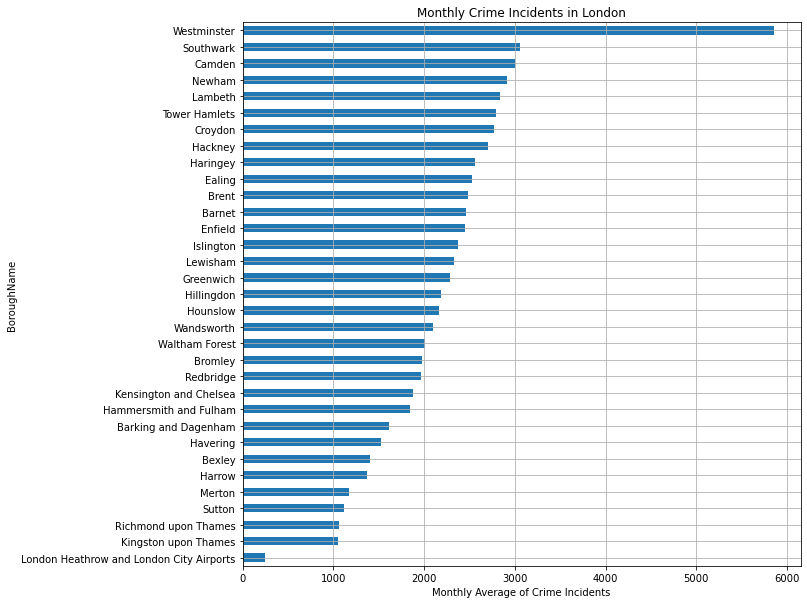

In [30]:
#Visualize crime data
crime.set_index('BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

#### NOTE1: Westminster has the biggest number of reported crime, followed by Southwark, Camden and Newham.

### 3.3 Data Preparation and Preprocessing

At this stage, we prepare our dataset for the modeling process, opting for the most suitable machine learning algorithm for our scope. Accordingly, we perform the following steps:

(a) Dropping columns which are not required for the modelling process.

(b) Combining and Merging data.

(c) Visualizing the Crime data.

(d) Join the data to find the coordinates of locations to make further recommendations.

(e) Plot recommended locations on London map. 

In [31]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([22], inplace=True)

In [32]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1618.625000,194352,51.5607,0.1557
1,Barnet,2467.208333,369088,51.6252,-0.1517
2,Bexley,1407.166667,236687,51.4549,0.1505
3,Brent,2488.833333,317264,51.5588,-0.2817
4,Bromley,1980.375000,317899,51.4039,0.0198


In [33]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [34]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [35]:
df.shape


(32, 5)

In [36]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1618.625000,194352,51.5607,0.1557,8.328317
1,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607
2,Bexley,1407.166667,236687,51.4549,0.1505,5.945264
3,Brent,2488.833333,317264,51.5588,-0.2817,7.844676
4,Bromley,1980.375000,317899,51.4039,0.0198,6.229573


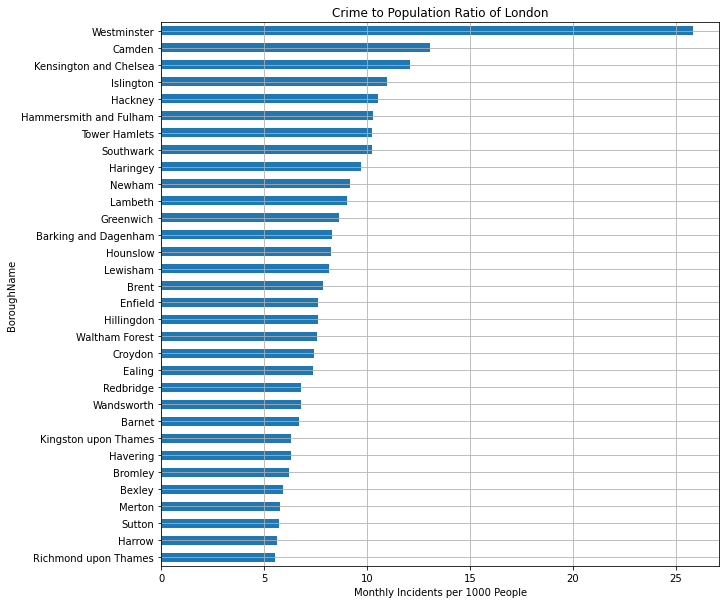

In [37]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [38]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [39]:
import folium
from geopy.geocoders import Nominatim

In [40]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [41]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

#### NOTE2: After taking population into consideration, we can now see that Westminster and Camden are the top 2 dangerous areas whereas Southwark and Newham goes further down the list.

### 3.4 Modeling 
#### Cluster Analysis

After exploring the dataset and gaining insights into it, we are ready to use the clustering methodology to analyze real estates. We will use the k-means clustering technique to group the boroughs according to what convenience facilities they have using Foursquare data.


In [42]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 189 uniques categories.


In [43]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")


In [44]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
onehot.shape

(1136, 190)

In [46]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
1,Barnet,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
2,Bexley,0.000000,0.000000,0.000000,0.000000,0.035714,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.035714,0.000000,0.035714,0.00,0.00,0.00,0.00,0.000000
3,Brent,0.000000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
4,Bromley,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
5,Camden,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
6,Croydon,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000
7,Ealing,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.00,...,0.00,0.000000,0.000000,0.040000,0.000000,0.02,0.00,0.00,0.00,0.000000
8,Enfield,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.020000,0.000000,0.000000,0.00,0.00,0.00,0.02,0.000000
9,Greenwich,0.025641,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.025641,0.025641,0.00,0.00,0.00,0.00,0.000000


In [47]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Gym / Fitness Center  0.14
1                  Park  0.14
2           Supermarket  0.14
3           Golf Course  0.14
4   Martial Arts School  0.14


----Barnet----
                    venue  freq
0                    Café  0.67
1                Bus Stop  0.33
2      African Restaurant  0.00
3                 Rafting  0.00
4  Okonomiyaki Restaurant  0.00


----Bexley----
            venue  freq
0             Pub  0.11
1  Clothing Store  0.11
2     Coffee Shop  0.11
3        Pharmacy  0.07
4     Supermarket  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.06
3        Grocery Store  0.06
4  American Restaurant  0.04


----Bromley----
                  venue  freq
0           Coffee Shop  0.12
1        Clothing Store  0.12
2           Pizza Place  0.05
3  Gym / Fitness Center  0.05
4                   Bar  0.05


----Camden----
           venue

In [48]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Gym / Fitness Center,Martial Arts School,Park,Golf Course,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,Café,Bus Stop,Yoga Studio,Creperie,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
2,Bexley,Pub,Coffee Shop,Clothing Store,Pharmacy,Fast Food Restaurant,Supermarket,Bakery,Plaza,Department Store,Portuguese Restaurant
3,Brent,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar,Sandwich Place,Sporting Goods Shop,American Restaurant,Indian Restaurant,Italian Restaurant
4,Bromley,Coffee Shop,Clothing Store,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Portuguese Restaurant,Chocolate Shop,Supermarket,Bookstore


In [49]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [50]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)

kmeans.labels_[0:10]

array([3, 2, 3, 1, 3, 1, 3, 1, 3, 3], dtype=int32)

In [51]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge London_grouped with London coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1618.625000,194352,51.5607,0.1557,8.328317,3,Pool,Bus Station,Supermarket,Gym / Fitness Center,Martial Arts School,Park,Golf Course,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,2467.208333,369088,51.6252,-0.1517,6.684607,2,Café,Bus Stop,Yoga Studio,Creperie,Fish Market,Fish & Chips Shop,Film Studio,Fast Food Restaurant,Farmers Market,Event Space
2,Bexley,1407.166667,236687,51.4549,0.1505,5.945264,3,Pub,Coffee Shop,Clothing Store,Pharmacy,Fast Food Restaurant,Supermarket,Bakery,Plaza,Department Store,Portuguese Restaurant
3,Brent,2488.833333,317264,51.5588,-0.2817,7.844676,1,Coffee Shop,Hotel,Grocery Store,Clothing Store,Bar,Sandwich Place,Sporting Goods Shop,American Restaurant,Indian Restaurant,Italian Restaurant
4,Bromley,1980.375000,317899,51.4039,0.0198,6.229573,3,Coffee Shop,Clothing Store,Pizza Place,Burger Joint,Gym / Fitness Center,Bar,Portuguese Restaurant,Chocolate Shop,Supermarket,Bookstore


In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# Cluster 0:  Lively Area (Restaurants, Market)
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 1: Hangout area (Pubs, Café)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 2: Quiet Area (Yoga studio)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 3: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

In [ ]:
# Cluster 4:  Traveller Area (Hotels, Airport Service, Airport Lounge)
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

## 4. Results
Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a real-estate developer.

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.

### 4.1. Safety
Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [ ]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

### 4.2 Atmosphere
And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

#### a) Cluster 0 is 'Lively Area' with restaurants, parks and markets as popular places.

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

#### b) Cluster 1 is 'Hangout Area' with many pubs and Cafés.

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

#### c) Cluster 2 is 'Quiet Area' with many Yoga studios.

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

#### d) Cluster 3 is 'Busy Area' with coffee shops, bus stop, and clothing shops as top venues.

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

#### e) Cluster 4 is 'Traveller Area' with  hotels, Airport, Airport service and Lounge.

In [ ]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

## 5. Discussion and Recommendations

Preference of Atmosphere defers with each person. As a student, who has lived in London for couple of years I would prefer to score the clusters based on my opinion for the sake of this project. The order I decide to weigh the clusters are: Busy Area,Lively Area, Hangout Area, Quiet Area, and Traveller Area.

### Weighted score table
Finally, let's calculate the scores of each borough.

In [ ]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

In [ ]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

In [ ]:
score['Atmosphere'] = 0
score.head()

In [ ]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

In [ ]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)


## 6. Conclusion
Based on our  analysis, the five boroughs below are the best places to build a student halls with regards to safety and atmosphere of the neighborhood. The top five boroughs all belong to the Busy Area cluster and Hangout Area Clusters with many Pubs,coffee shops and clothing stores . Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [ ]:
df_top5 = df.iloc[[1,22,19,7,3],:]
df_top5

In [ ]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

## 7. Limitations


One of the limitations in this research is that the best places recommended are far away from the city centre and in the suburbs. This is because, only popular venues and the number crime incidents were taken into account to recommend a safe and profitable location to build a student hall. Therefore, a crime which is as serious as homicides were treated as same as petty burglaries. Also, venues with popular stores were only taken into account but we have not considered its importance to a student.

Further research needs to be done on the basis of distance from the city centre, level of seriousness of each crime, current housing prices to overcome this limitation. However, this research still holds good because of the in-depth exploration of each neighborhood and recommendations of suitable places to construct a student hall based on the limited categories taken in to account for the purpose of this project.
